In [17]:
import numpy as np
import pandas as pd
from datetime import date, datetime
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

In [4]:
user_table = pd.read_excel("D:\\Work\\Dự án Đh Kyungpook\\Project 1\\FileCsv\\8_tbl_usertable.xlsx")
user_table.head(5)

,id,username,password,userid,gender,Address,Date_of_bird,login_method,"is_active(fb, gg = 1)",date_created,IP_address,active_token,reset_token
0,NaN,huyhuyvu01@gmail.com,123456,2.201030e+09,Male,NaN,2001-12-01,Facebook,0,2021-01-01 10:56:11+07,113.176.251.74,abc,abc
1,NaN,huyhuyvu02@gmail.com,huy123123,2.201030e+09,Male,NaN,2001-10-02,Facebook,1,2022-01-03 10:41:54.553997+07,113.170.132.21,abc,abc
2,NaN,mamtomtn2001@gmail.com,vuhai123,2.201030e+09,Female,NaN,2010-06-02,Facebook,0,2022-01-03 02:43:47.142815+07,113.170.132.22,abc,abc
3,NaN,phamdinhlam@gmail.com,huy123124,2.201040e+09,Male,NaN,2013-01-28,Facebook,1,2022-01-03 02:48:39.214508+07,113.170.132.23,abc,abc
4,NaN,vuhai@gmail.com,vuhai124,2.201040e+09,Female,NaN,1996-03-26,Gmail,1,2022-01-03 10:29:18.683803+07,113.162.76.169,abc,abc


In [6]:
display(user_table["gender"].value_counts().rename_axis('gender').reset_index(name='counts'))
display(user_table["login_method"].value_counts().rename_axis('login_method').reset_index(name='counts'))

,gender,counts
0,Male,10
1,Female,9


,login_method,counts
0,Password,9
1,Facebook,7
2,Gmail,3


In [6]:
YearNow = datetime.now().year
user_table["Date_of_bird"] = pd.to_datetime(user_table["Date_of_bird"])
user_table["age"] = YearNow - user_table["Date_of_bird"].dt.year
user_table = user_table.sort_values(by='age', ascending=True, inplace=False)
display(user_table["age"].head(5))

3      9
13     9
14    10
2     12
12    12
Name: age, dtype: int64

In [7]:
AgeBins = np.array(list([0,8,12,18,25,40,60,100]))
AgeArray = np.array(user_table["age"])
print(AgeBins)
user_table["binnedAge"] = pd.cut(AgeArray, AgeBins)
dataAge = user_table["binnedAge"].value_counts().rename_axis('age').reset_index(name='counts')
print(str(dataAge['age'][1]))

[  0   8  12  18  25  40  60 100]
(8, 12]


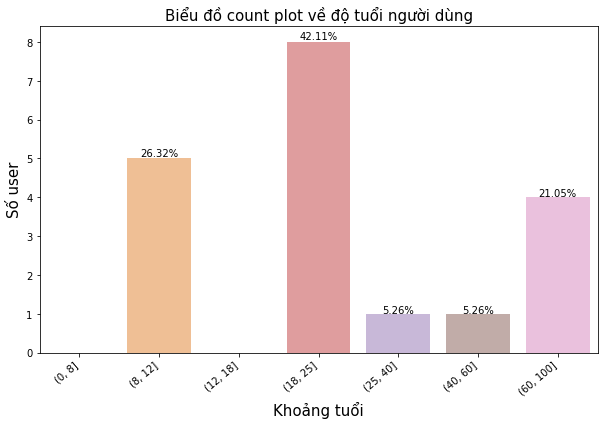

In [29]:
figure(figsize=(10, 6))
plt.title("Biểu đồ count plot về độ tuổi người dùng", size = 15)
ax = sns.countplot(x="binnedAge", data=user_table, alpha=0.5)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.xlabel("Khoảng tuổi", size = 15)
plt.ylabel("Số user", size = 15)

for p in ax.patches:
    percentage = '{:.2f}%'.format(100 * p.get_height()/len(user_table))
    x = p.get_x() + p.get_width() / 2
    y = p.get_height() + p.get_height()*0.01
    ax.annotate(percentage, (x, y),ha='center',size = 10)

plt.show()